In [1]:
import logging
logging.getLogger('tensorflow').disabled = True

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [3]:
import pandas as pd
import os

In [4]:
pwd = os.getcwd()
filepath=os.path.join(pwd,"Dataset").replace("\\", "/")

In [5]:
train_ds = keras.utils.image_dataset_from_directory( 
    directory = os.path.join(filepath,'train'),
    labels='inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
      directory =os.path.join(filepath,'test'),
      labels='inferred',
      label_mode ='int',
      batch_size=32,
      image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
    image = tf.cast(image/255.,tf.float32) 
    return image, label
train_ds=train_ds.map(process) 
validation_ds = validation_ds.map(process)

In [7]:
model= Sequential()
model.add(Conv2D (32, kernel_size=(3,3), padding= 'valid', activation= 'relu', input_shape=(256,256,3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D (64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D (128, kernel_size=(3,3), padding= 'valid', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout (0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout (0.1))
model.add(Dense (1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
optimizer = tf.compat.v1.train.AdamOptimizer()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 498s 792ms/step - loss: 1.4105 - accuracy: 0.5691 - val_loss: 0.6679 - val_accuracy: 0.5920
Epoch 2/10
625/625 [==============================] - 432s 691ms/step - loss: 0.5923 - accuracy: 0.6827 - val_loss: 0.6568 - val_accuracy: 0.6856
Epoch 3/10
625/625 [==============================] - 406s 650ms/step - loss: 0.4982 - accuracy: 0.7469 - val_loss: 0.5320 - val_accuracy: 0.7434
Epoch 4/10
625/625 [==============================] - 396s 634ms/step - loss: 0.4529 - accuracy: 0.7807 - val_loss: 0.5281 - val_accuracy: 0.7358
Epoch 5/10
625/625 [==============================] - 393s 629ms/step - loss: 0.3902 - accuracy: 0.8127 - val_loss: 0.5018 - val_accuracy: 0.7510
Epoch 6/10
625/625 [==============================] - 411s 658ms/step - loss: 0.3493 - accuracy: 0.8426 - val_loss: 0.5752 - val_accuracy: 0.6912
Epoch 7/10
625/625 [==============================] - 428s 684ms/step - loss: 0.2863 - accuracy: 0.8680 - val_loss: 0.7385 -

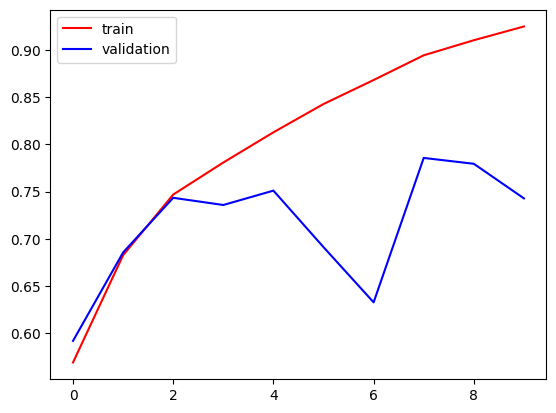

In [11]:
plt.plot(history.history['accuracy'], color="red", label="train") 
plt.plot(history.history['val_accuracy'], color="blue", label="validation")
plt.legend()
plt.show()

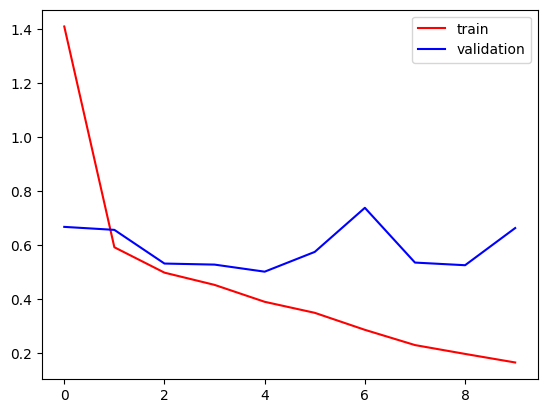

In [12]:
plt.plot(history.history['loss'], color="red", label="train") 
plt.plot(history.history['val_loss'], color="blue", label="validation")
plt.legend()
plt.show()

In [14]:
model.save('model.h5')


In [23]:
import cv2

In [24]:
test_image=cv2.imread(os.path.join(pwd,'cat.jpg'))

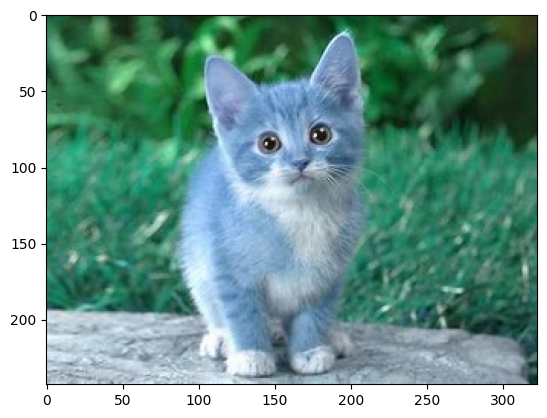

In [25]:
plt.imshow(test_image)

In [26]:
test_image.shape

(243, 323, 3)

In [27]:
test_image=cv2.resize(test_image,(256,256))

In [28]:
test_input=test_image.reshape(1,256,256,3)

In [29]:
a=model.predict(test_input)

1/1 [==============================] - 0s 37ms/step


In [30]:
if a==0:
    print("It is a Cat")
else:
    print("It is a Dog")

It is a Cat
